In [1]:
import sys
import os

# Check current working directory
current_dir = os.getcwd()
print(f"Current Directory: {current_dir}")

# Change to your project root directory
project_root = '/home/razvansavin/Proiecte/flexiai'
os.chdir(project_root)
print(f"Changed Directory to: {os.getcwd()}")

# Add project root directory to sys.path
sys.path.append(project_root)
print(f"Project root added to sys.path")

Current Directory: /home/razvansavin/Proiecte/flexiai/examples/Code examples
Changed Directory to: /home/razvansavin/Proiecte/flexiai
Project root added to sys.path


In [2]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Imports and Initialization
from flexiai.core.flexiai_client import FlexiAI
from flexiai.config.logging_config import setup_logging
from flexiai.core.utils.helpers import HelperFunctions

# Set up logging
setup_logging()

# Initialize FlexiAI
flexiai = FlexiAI()

# Use the given assistant ID
assistant_id = 'asst_bxt62YG46C5wn4t5U1ESqJZf'


Image saved to user_flexiai_rag/data/images/generated_image_e0939e56-d9c2-4a0b-8ec2-366a50df918f.png


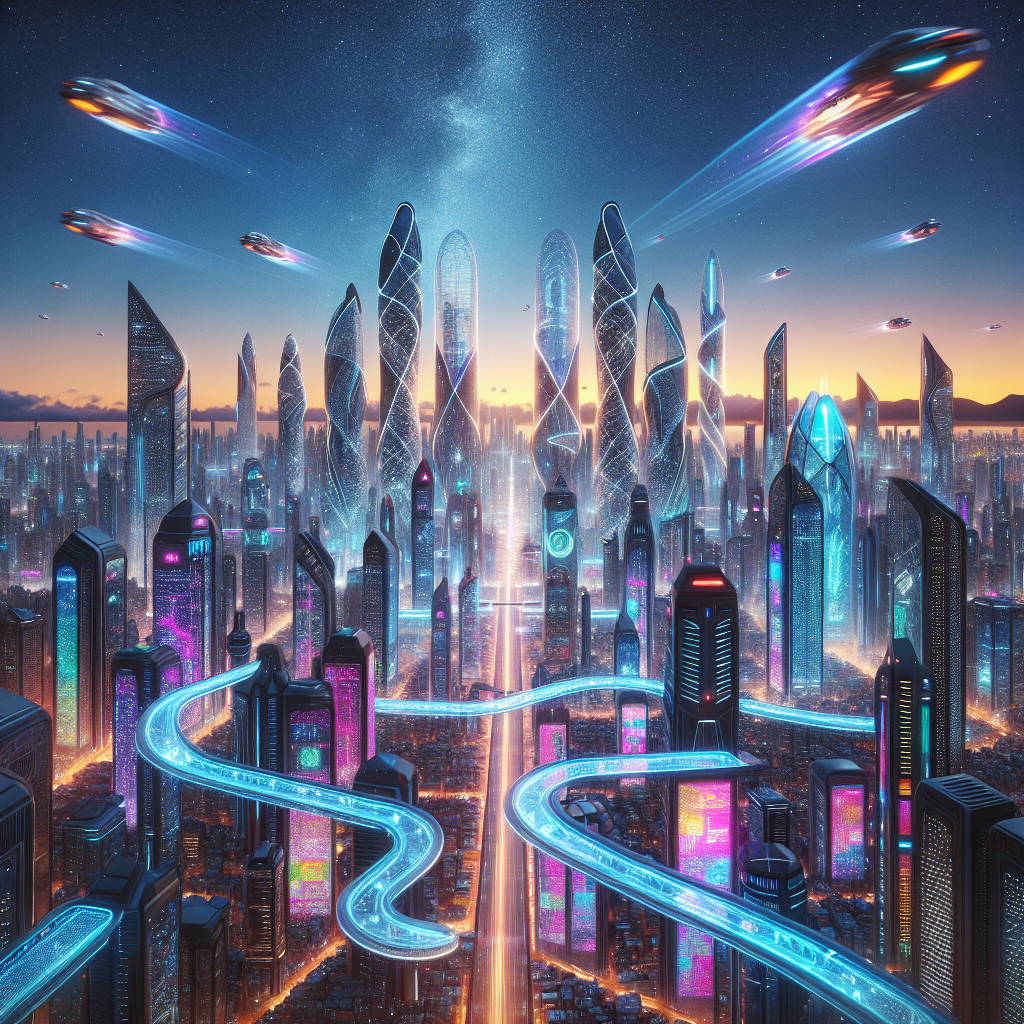

Image saved to user_flexiai_rag/data/images/generated_image_1bc706cc-85e5-4b53-b6f7-af3810d79177.png


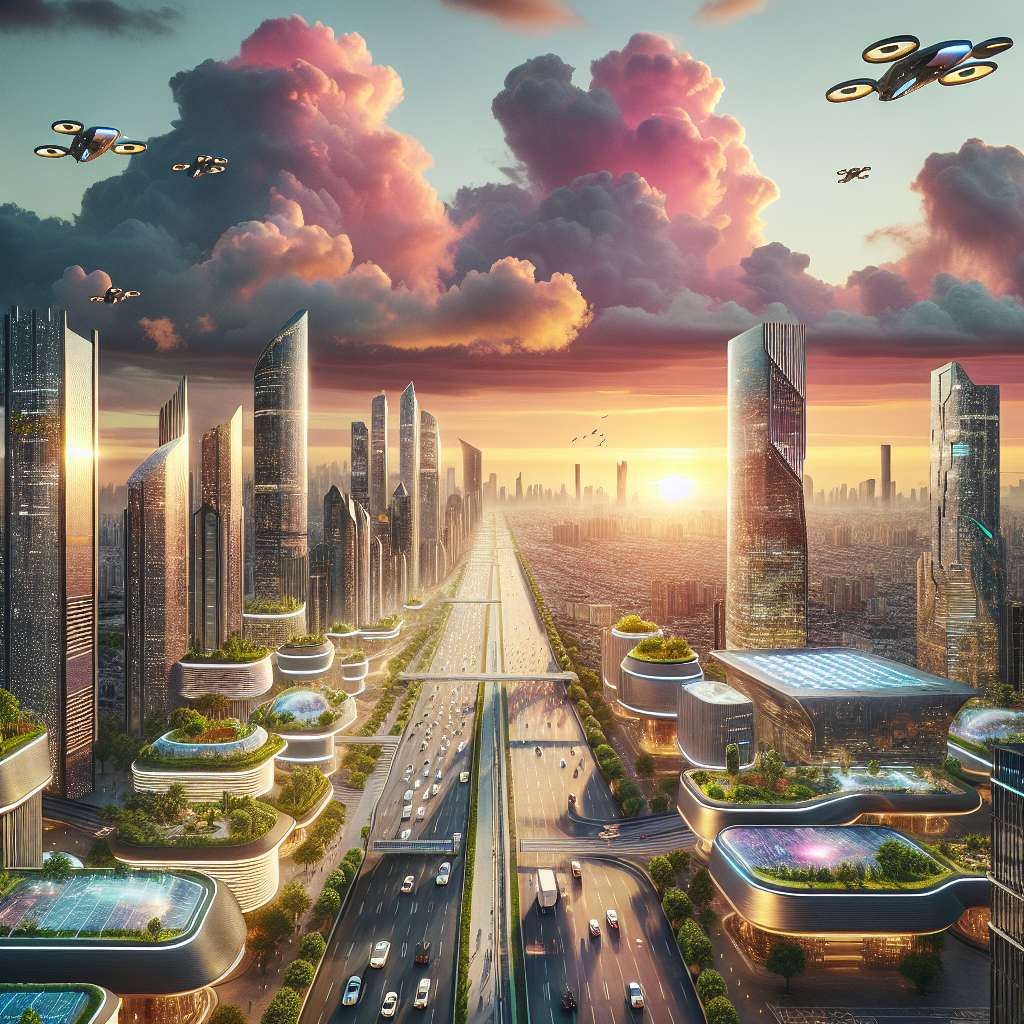

In [4]:
import uuid
from IPython.display import display, Image as IPythonImage

# Function to handle the generated images and save them
def handle_generated_images(images, response_format='url'):
    for image_data in images:
        unique_id = uuid.uuid4()
        file_path = f"user_flexiai_rag/data/images/generated_image_{unique_id}.png"
        flexiai.images_manager.save_image(image_data, file_path, response_format)
        print(f"Image saved to {file_path}")
        # Display the image in the notebook
        display(IPythonImage(filename=file_path))

# Create an image and save the URLs
try:
    image_urls = flexiai.images_manager.create_image("A futuristic city skyline at night", n=1, size="1024x1024", model="dall-e-3", response_format="url")
    handle_generated_images(image_urls, response_format='url')
except Exception as e:
    print(f"Error creating image: {str(e)}")

# Create an image and save the base64-encoded JSON strings
try:
    image_b64_jsons = flexiai.images_manager.create_image("A futuristic city skyline at sunset", n=1, size="1024x1024", model="dall-e-3", response_format="b64_json")
    handle_generated_images(image_b64_jsons, response_format='b64_json')
except Exception as e:
    print(f"Error creating image: {str(e)}")
